<h1><center> Class_04_add</center></h1>

#  Perceptron

* Deep Learning from Scratch : https://www.ebook3000.co/deep-learning-from-scratch/

* Perceptron is an algorithm developed by Frank Rosenblatt in 1957. **Perceptron is an algorithm that is the origin of neural networks(deep learning)**. Learning the structure of the perceptron is an important idea to advance into neural networks and deep learning.  

* The most important basic unit of a neural network is the perceptron.  A perceptron is the smallest neural network unit that uses an input value and an activation function to pass an output value to the next.    
    
<img src = './images/neuron.png' width=400 height=100> 

<img src = './images/fig 1_1.png' width=410 height=100>  



## What is perceptron

* Perceptron receives **multiple signals** as inputs and outputs **one signal**. It is good to imagine that there is a flow like a electric current or a river. Like a electric current or a river, perceptron signal makes flow and forwards information. But perceptron signal can have two values : 'flow(1) / not flow(0)'.  




[Figure 1]
<img src = './images/fig 2-1.png' width=200 height=100>

[Figure 1] is an example of perceptron that receives two signals as input. x1 and x2 are input signals, y is output signal, w1 and w2 are weights. Circle is called neuron or node. When the input signal is sent to a neuron, each unique weight is multiplied(w1x1, w2x2). Outputs 1 only when the sum of the signals sent from the neurons exceeds the specified limit(it is also referred to as 'neuron activate'). The limit is called the threshold and it is represented by a theta character.

The above expression can be expressed as [Expression 1]

[Expression 1]
<img src = './images/e 2.1.png' width=200 height=100>

Perceptrons give unique weights to each of the multiple input signals. The weights act as factors that control the effect each signal has on the outcome. In other words, the larger the weight, the more important the signal is.

Substituting -b for theta in the above expression gives: 
    
<img src = './images/e 2.2.png' width=200 height=100>

b is the bias and w is the weight


## Simple logic gate
### AND, NAND, OR gate

>   ### AND      : Both 1 => 1
>   ### NAND :  One or Two 1 =>1  (Both 1 => 0)
>   ### OR        : One or Two 1 =>1

## Implementing Perceptron

In [123]:
%matplotlib inline
import math
import time
import numpy as np
import tensorflow as tf
# weight and bias functions

def AND(x1, x2):
    x = np.array([x1, x2]) # input
    w = np.array([0.5, 0.5]) # weight
    b = -0.7  #bias                  
    tmp = np.sum(w * x) + b
    if tmp <= 0:
        return 0
    else:
        return 1


def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])  # Only the w and b are different from AND.
    b = 0.7
    tmp = np.sum(w * x) + b
    if tmp <= 0:
        return 0
    else:
        return 1


def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])  # nly the w and b are different from AND.
    b = -0.2
    tmp = np.sum(w * x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [124]:
print("AND")
print(AND(0, 0))  # 0
print(AND(0, 1))  # 0
print(AND(1, 0))  # 0
print(AND(1, 1))  # 1

AND
0
0
0
1


In [125]:
print("NAND")
print(NAND(0, 0))  # 1
print(NAND(0, 1))  # 1
print(NAND(1, 0))  # 1
print(NAND(1, 1))  # 0

NAND
1
1
1
0


In [126]:
print("OR")
print(OR(0, 0))  # 0
print(OR(0, 1))  # 1
print(OR(1, 0))  # 1
print(OR(1, 1))  # 1

OR
0
1
1
1


## Limitations of Perceptron

### XOR     : only when different values (Only one 1 => 1)  
   >### Exclusive OR: Reject values that are equal to each other 
    (배타적 논리합 : 서로 같은 값을 거부함)
    >### XOR is a two-layer perceptron. It has been proven that any function can be expressed by using a two-layer perceptron (= nonlinear signoid function) as an activation function.
> ## Multilayer Perceptron (MLP)
<img src = './images/fig 8.png' width=400 height=200>  


#### The XOR gate cannot be implemented with a single-layer (linear) perceptron.  
>####  = A single-layer perceptron cannot separate nonlinear regions.  
>#### Can be implemented through multi-layer perceptron.

#### Combining Existing Gates

>### XOR(x1, x2) = AND(NAND(x1, x2), OR(x1, x2))

In [127]:
# XOR gate

def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [128]:
print("XOR")
print(XOR(0, 0))  # 0
print(XOR(0, 1))  # 1
print(XOR(1, 0))  # 1
print(XOR(1, 1))  # 0

XOR
0
1
1
0


<img src = './images/xor.png' width=400 height=200>
<img src = './images/xor_2.png' width=400 height=200>

# XOR logic with two Dense layers

In [129]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  %tensorflow_version 2.x
except Exception:
  pass

In [130]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
# random seed for always same results
tf.random.set_seed(678)

In [131]:
import numpy as np

In [132]:
print(tf.__version__)

2.4.1


# Inputs and Labels

In [133]:
X_ = np.array([[0.,0.],[0.,1.],[1.,0.],[1.,1.]])
y_ = np.array([0.,1.,1.,0.])

# Two dense Layers

In [134]:
model = Sequential()

# first dense layer
model.add(Dense(units=2,activation='sigmoid',input_dim=2))
# second dense layer
model.add(Dense(units=1,activation='sigmoid'))

In [135]:
# loss function and optimization
model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [136]:
# model summary
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
None


# Train

In [137]:
# Train (takes about 3 minutes from Colab)
model.fit(X_,y_,epochs=50000,batch_size=4,verbose=0)

# Test

[0, 0], [0, 1] outputs are less than 0.5,  
[0, 1], [1, 0] outputs are greater than 0.5

In [138]:
print(model.predict(X_,batch_size=4))

[[0.06947979]
 [0.86743605]
 [0.8677261 ]
 [0.2499043 ]]


# Printing First Dense layer's weights and bias

> first node's weights are 3.5567355, 3.549393, bias is -5.4060693 
> second node's weights are 5.79164, 5.7427516, bias is -2.3299

In [139]:
print("first layer weights: ",model.layers[0].get_weights()[0])
print("first layer bias: ",model.layers[0].get_weights()[1])

first layer weights:  [[-2.7477374 -5.467265 ]
 [-2.765913  -5.5713253]]
first layer bias:  [3.8581967 1.7341115]


# Print Second Dense layer's weights and bias

>weights are -7.8013854, 7.392064, bias is-3.3388186

In [140]:
print("second layer weights: ",model.layers[1].get_weights()[0])
print("second layer bias: ",model.layers[1].get_weights()[1])

second layer weights:  [[ 5.3055277]
 [-6.872516 ]]
second layer bias:  [-1.9493619]


# calculate yourself and verify same result with TF dense layers

In [141]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def get_output(x):
    layer0 = model.layers[0]
    # first dense layer, first node output
    layer0_weights, layer0_bias = layer0.get_weights()
    layer0_node0_weights = np.transpose(layer0_weights)[0]
    layer0_node0_bias = layer0_bias[0]
    layer0_node0_output = sigmoid( np.dot( x, layer0_node0_weights ) + layer0_node0_bias )
    # second dense layer, second node output
    layer0_node1_weights = np.transpose(layer0_weights)[1]
    layer0_node1_bias = layer0_bias[1]
    layer0_node1_output = sigmoid( np.dot( x, layer0_node1_weights ) + layer0_node1_bias )
    # second layer output
    layer1 = model.layers[1]
    layer1_weights, layer1_bias = layer1.get_weights()
    layer1_output = sigmoid( np.dot( [layer0_node0_output, layer0_node1_output], layer1_weights ) + layer1_bias )

    print(layer1_output)

In [142]:
get_output([0,0])

0.06947978261626493


In [143]:
get_output([0,1])

0.8674360204719486


In [144]:
get_output([1,0])

0.8677261423759945


In [145]:
get_output([1,1])

0.24990429967153485


# From perceptron to neural network

Neural networks have much in common with the perceptrons described in the above. 
We describe the structure of neural networks, focusing on differences from perceptron.

### Examples of neural networks

If the neural network is shown as a picture, it becomes like Figure 3. Here, the leftmost line is the input layer, the rightmost line is the output layer, and the middle line is the hidden layer. The Neuron of the hidden layer (unlike the input layer and output layer) is not visible to the human eye. So it is 'Hidden'. In this book, we will say 0-layer, 1-layer, 2-layer in the direction of output layer from input layer. In Figure 3-1, the 0-layer is the input layer, the 1-layer is the hidden layer, and the 2-layer is the output layer.

[Figure 3] Examples of neural networks
<img src = './images/fig 3-15-1.png' width=400 height=200>

Add bias and activation function
>A function that converts the sum of input signals into an output signal is generally called an activation function (_h(x)_).
<img src = './images/fig 3-4.png' width=200 height=100>


## Activation Functions

<img src = './images/fig 9.png' width=800 height=200>  

### Gradient Loss Problem and Activation Function


#### The multilayer perceptron met error backpropagation and became a neural network, and the neural network solves the XOR problem lightly, but the results are not as good as expected.

#### Why?

<img src = './images/fig 4.png' width=400 height=200>  

 * Backpropagation is a way to go backward one by one from the output layer and modify the weights of each layer  
 * Modifying the weights requires the derivative, i.e. the gradient  
 * However, as the layers increase, **the vanishing gradient** problem begins to occur, in which the gradient becomes 0 in the middle.

<img src = './images/fig 5.png' width=400 height=200>  

[sigmoid function]
<img src = './images/fig 6.png' width=400 height=200>  
* To solve this, we started replacing the activation function with a number of non-sigmoid functions.

<img src = './images/fig 7.png' width=600 height=300>  

* ReLU, proposed by Professor Jeffrey Hinton of the University of Toronto, is emerging as an alternative to sigmoid and is currently the most widely used activation function. Relu treats all values as 0 when x is less than 0, and uses x as it is for values greater than 0. Using this method, the derivative is 1 as long as x is greater than 0.  
* Therefore, even if it is multiplied through several hidden layers, it can remain without disappearing until the first layer: the development of deep learning is accelerating.  

### Implementing a 3-layer neural network

<img src = './images/fig 3-15-2.png' width=500 height=300>  


In [146]:

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def identity_function(x):
    return x

def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y) # [ 0.31682708 0.69627909 ]

[0.31682708 0.69627909]


# Linear Regression _Ex1_

In [149]:
!pip install xlrd

In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Owner\Anaconda\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Owner\Anaconda\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Owner\Anaconda\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
seoul_born_death_mrg = pd.read_csv('./data/05 seoul_born_death_mrg_div_df.csv',  encoding='cp949') # utf-8 makes error (hangul)

seoul_born_death_mrg

seoul_pop = pd.read_excel('./data/02_1. Population_in_Seoul(2002_2021).xlsx',  encoding='cp949') # utf-8 makes error (hangul)
seoul_pop

sel_pop_tot = seoul_pop.iloc[1:2,[4,10,16,22,28,34,40,46,52,58,64,70,76,82,88,94,100,106,112,118]]
sel_pop_tot.iloc[0].shape

(20,)

In [3]:
seoul_born_death_inc = seoul_born_death_mrg['# of born'] - seoul_born_death_mrg['# of death']

In [4]:
seoul_born_death_mrg['# inc'] = seoul_born_death_inc
seoul_born_death_mrg['tot_pop'] = list(sel_pop_tot.iloc[0])

seoul_born_death_mrg

,Year,# of marriges,# of divorces,# of death,# of born,# inc,tot_pop
0,2002,72696,29351,38925,102008,63083,10207295
1,2003,72750,32499,38068,101227,63159,10174086
2,2004,71553,26994,38274,99828,61554,10173162
3,2005,71286,25300,38751,90468,51717,10167344
4,2006,73924,24354,38519,93922,55403,10181166
5,2007,76399,24615,39016,101249,62233,10192710
6,2008,71753,23319,38298,94736,56438,10200827
7,2009,68841,23920,38790,89594,50804,10208302
8,2010,70466,21768,40130,93266,53136,10312545
9,2011,71519,20617,40320,91526,51206,10249679


In [5]:
x=seoul_born_death_mrg['Year']
y=seoul_born_death_mrg['# of born']

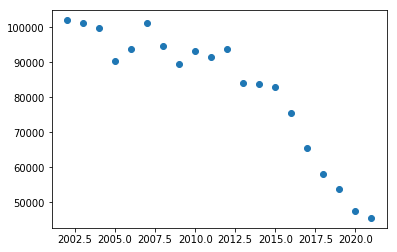

In [6]:
plt.plot(x, y, 'o')
plt.show()

In [7]:
line_fitter = LinearRegression()
line_fitter.fit(x.values.reshape(-1,1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
line_fitter.predict([[2030]])

array([29790.11578947])

In [9]:
line_fitter.coef_ # slope

array([-2844.23157895])

In [10]:
line_fitter.intercept_ # y bias 절편

5803580.221052634

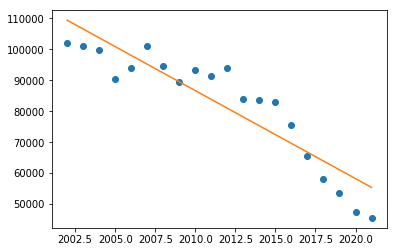

In [11]:
plt.plot(x, y, 'o')
plt.plot(x,line_fitter.predict(x.values.reshape(-1,1)))
plt.show()

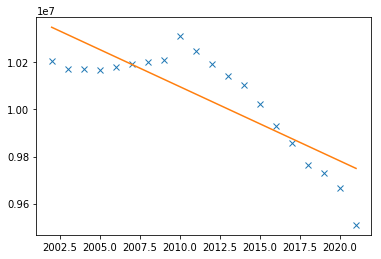

In [12]:
x=seoul_born_death_mrg['Year']
y2=seoul_born_death_mrg['tot_pop']
line_fitter = LinearRegression()
line_fitter.fit(x.values.reshape(-1,1), y2)
plt.plot(x, y2, 'x')
plt.plot(x,line_fitter.predict(x.values.reshape(-1,1)))
plt.show()

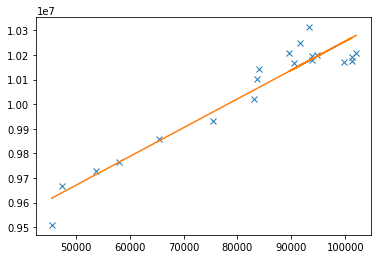

In [13]:
x3=seoul_born_death_mrg['# of born']
y3=seoul_born_death_mrg['tot_pop']
line_fitter.fit(x3.values.reshape(-1,1), y3)
plt.plot(x3.values.reshape(-1,1), y3, 'x')
plt.plot(x3,line_fitter.predict(x3.values.reshape(-1,1)))
plt.show()

# Linear Regression _Ex 2_
<a href="http://www.data4sci.com/">www.data4sci.com</a>

In [14]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('./class_04_d4sci.style')

OSError: './class_04_d4sci.style' not found in the style library and input is not a valid URL or path; see `style.available` for list of available styles

## Load dataset

In [15]:
data = np.array(np.loadtxt("./data/Anscombe1.dat"))

print(data)

[[10.    8.04]
 [ 8.    6.95]
 [13.    7.58]
 [ 9.    8.81]
 [11.    8.33]
 [14.    9.96]
 [ 6.    7.24]
 [ 4.    4.26]
 [12.   10.84]
 [ 7.    4.82]
 [ 5.    5.68]]


In [16]:
X = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

In [17]:
X

array([[10.],
       [ 8.],
       [13.],
       [ 9.],
       [11.],
       [14.],
       [ 6.],
       [ 4.],
       [12.],
       [ 7.],
       [ 5.]])

In [18]:
y

array([[ 8.04],
       [ 6.95],
       [ 7.58],
       [ 8.81],
       [ 8.33],
       [ 9.96],
       [ 7.24],
       [ 4.26],
       [10.84],
       [ 4.82],
       [ 5.68]])

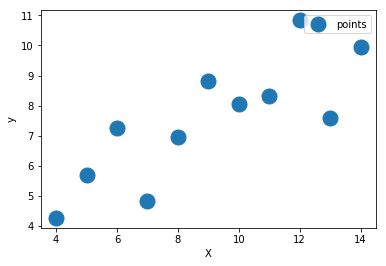

In [19]:
plt.plot(X, y, '.', markersize= 30, label='points')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

Get matrix dimensions and add the bias column

In [20]:
X.shape

(11, 1)

In [21]:
# np.ones((M, 1)),X

In [22]:
M, N = X.shape
X = np.concatenate((np.ones((M, 1)), X), axis=1) #Add x0 for the bias/intercept

In [23]:
print(X)

[[ 1. 10.]
 [ 1.  8.]
 [ 1. 13.]
 [ 1.  9.]
 [ 1. 11.]
 [ 1. 14.]
 [ 1.  6.]
 [ 1.  4.]
 [ 1. 12.]
 [ 1.  7.]
 [ 1.  5.]]


Set the training parameters and initialize the weight matrix

In [24]:
alpha = 0.01
epsilon = 0.12

weights = 2*np.random.rand(N+1, 1)*epsilon - epsilon
count = 0

## Training Procedure

100 0.9967653786551831 0.0008092079653841955 [0.40377468 0.75717688]
200 0.924128457519429 0.0006508561694966719 [0.67162423 0.73065455]
300 0.8657056660038159 0.0005234918234771069 [0.91184103 0.7068684 ]
400 0.8187154781612214 0.00042105107409418085 [1.1272758  0.68553615]
500 0.7809206776013702 0.0003386566877363606 [1.3204852  0.66640465]
600 0.7505218429735144 0.00027238584391586773 [1.49376211 0.64924685]
700 0.7260716769971559 0.00021908336865217315 [1.64916286 0.63385915]
800 0.7064061002212734 0.00017621151572955185 [1.78853166 0.62005892]
900 0.6905888288660569 0.00014172914387255986 [1.91352245 0.60768239]
1000 0.677866798082226 0.00011399453741578469 [2.02561853 0.59658269]
1100 0.6676343083164525 9.168724374875037e-05 [2.12615019 0.58662809]
1200 0.6594041877809986 7.37452061907451e-05 [2.21631049 0.57770047]
1300 0.6527845980644617 5.9314199159166137e-05 [2.29716937 0.56969386]
1400 0.6474603785920349 4.770715824953253e-05 [2.36968643 0.56251325]
1500 0.6431780417396833 3

Text(0, 0.5, 'Error')

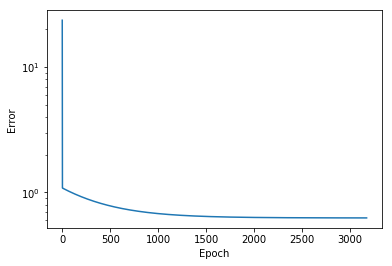

In [25]:
oldJ = 0
err = 1

Js = []

while err > 1e-6:
    Hs = np.dot(X, weights)
    deltas = alpha/M*np.dot(X.T, (Hs-y))

    count += 1
    weights -= deltas

    J = np.sum(np.power(Hs-y, 2.))/(2*M)
    Js.append(J)
    err = np.abs(oldJ-J)
    oldJ = J
    
    if count % 100 == 0:
        print(count, J, err, weights.flatten())

print(count, J, err, weights.flatten())

fig, ax = plt.subplots(1)
ax.semilogy(Js)
ax.set_xlabel('Epoch')
ax.set_ylabel('Error')

In [26]:
weights.flatten()

array([2.90883414, 0.50912711])

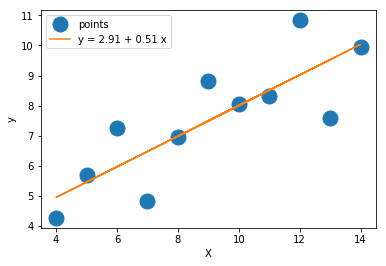

In [27]:
plt.plot(X.T[1], y, '.', markersize=30, label='points')
plt.plot(X.T[1], np.dot(X, weights.flatten()), '-',\
         label='y = %2.2f + %2.2f x' % tuple(weights.flatten()))
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

In [ ]:
weights

# Multiple Linear Regression

In [28]:
# seoul_born_death_mrg['tot_pop'] = list(sel_pop_tot.iloc[0])
seoul_born_death_mrg

,Year,# of marriges,# of divorces,# of death,# of born,# inc,tot_pop
0,2002,72696,29351,38925,102008,63083,10207295
1,2003,72750,32499,38068,101227,63159,10174086
2,2004,71553,26994,38274,99828,61554,10173162
3,2005,71286,25300,38751,90468,51717,10167344
4,2006,73924,24354,38519,93922,55403,10181166
5,2007,76399,24615,39016,101249,62233,10192710
6,2008,71753,23319,38298,94736,56438,10200827
7,2009,68841,23920,38790,89594,50804,10208302
8,2010,70466,21768,40130,93266,53136,10312545
9,2011,71519,20617,40320,91526,51206,10249679


In [29]:
from sklearn.model_selection import train_test_split

multi_x = seoul_born_death_mrg[['# of born','# of marriges']]
multi_y = seoul_born_death_mrg[['tot_pop']]

multi_x_train, multi_x_test, multi_y_train, multi_y_test = train_test_split(multi_x, multi_y, train_size=0.8, test_size=0.2)

In [30]:
len(multi_x_train)

16

In [31]:
mlr = LinearRegression()
mlr.fit(multi_x_train, multi_y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
r_sq = mlr.score(multi_x_test, multi_y_test) # Performance Indicators of Regression Models
r_sq

0.7849032007323704

In [33]:
r_sq_t = mlr.score(multi_x_train, multi_y_train) # Performance Indicators of Regression Models
r_sq_t

0.9612113219710109

In [34]:
mlr.coef_

array([[ 1.5194918 , 18.01167898]])

In [35]:
mlr.intercept_

array([8776954.04746057])

In [36]:
multi_y_predict = mlr.predict(multi_x_test)

No handles with labels found to put in legend.


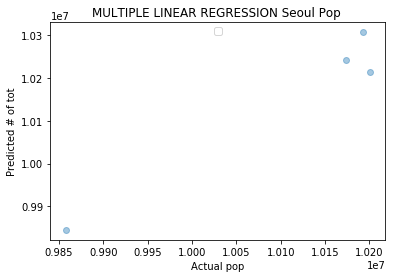

In [37]:
plt.scatter(multi_y_test, multi_y_predict, alpha=0.4)
plt.xlabel("Actual pop")
plt.ylabel("Predicted # of tot")
plt.title("MULTIPLE LINEAR REGRESSION Seoul Pop ")
plt.legend(loc= 'upper center')

plt.show()
# plt.plot(x,line_fitter.predict(x.values.reshape(-1,1)))
# plt.show()

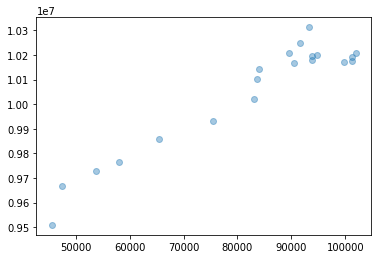

In [38]:
plt.scatter(seoul_born_death_mrg[['# of born']], seoul_born_death_mrg[['tot_pop']], alpha=0.4)
plt.show()

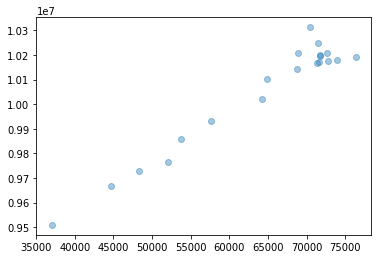

In [39]:
plt.scatter(seoul_born_death_mrg[['# of marriges']], seoul_born_death_mrg[['tot_pop']], alpha=0.4)
plt.show()

In [40]:
<img src = './images/fig 10.png' width=800 height=200>  

SyntaxError: invalid syntax (<ipython-input-40-94b124c2bc4c>, line 1)

# Logistic Regression (Classification) _Ex 1_

In [7]:
#-*- coding: utf-8 -*-
import tensorflow as tf
import numpy as np

In [8]:
# x,y random data values
data = [[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14, 1]]
x_data = [x_row[0] for x_row in data]
y_data = [y_row[1] for y_row in data]

In [9]:
x_data

[2, 4, 6, 8, 10, 12, 14]

In [10]:
# Arbitrarily set the values of a and b
a = tf.Variable(tf.random.normal([1], dtype=tf.float64, seed=0))
b = tf.Variable(tf.random.normal([1], dtype=tf.float64, seed=0))

In [11]:
# Establish an equation for the y sigmoid function
y = 1/(1 + np.e**(a * x_data + b))

In [12]:
# function to find the loss
loss = -tf.reduce_mean(np.array(y_data) * tf.math.log(y) + (1 - np.array(y_data)) * tf.math.log(1 - y))

In [13]:
# learning_rate
learning_rate=0.5

In [14]:
# Find the value that minimizes the loss
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [15]:
# training
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for i in range(60001):
        sess.run(gradient_decent)
        if i % 6000 == 0:
            print("Epoch: %.f, loss = %.4f, 기울기 a = %.4f, 바이어스 b = %.4f" % (i, sess.run(loss), sess.run(a), sess.run(b)))

Epoch: 0, loss = 1.2676, 기울기 a = 0.1849, 바이어스 b = -0.4334
Epoch: 6000, loss = 0.0152, 기울기 a = -2.9211, 바이어스 b = 20.2982
Epoch: 12000, loss = 0.0081, 기울기 a = -3.5637, 바이어스 b = 24.8010
Epoch: 18000, loss = 0.0055, 기울기 a = -3.9557, 바이어스 b = 27.5463
Epoch: 24000, loss = 0.0041, 기울기 a = -4.2380, 바이어스 b = 29.5231
Epoch: 30000, loss = 0.0033, 기울기 a = -4.4586, 바이어스 b = 31.0675
Epoch: 36000, loss = 0.0028, 기울기 a = -4.6396, 바이어스 b = 32.3346
Epoch: 42000, loss = 0.0024, 기울기 a = -4.7930, 바이어스 b = 33.4086
Epoch: 48000, loss = 0.0021, 기울기 a = -4.9261, 바이어스 b = 34.3406
Epoch: 54000, loss = 0.0019, 기울기 a = -5.0436, 바이어스 b = 35.1636
Epoch: 60000, loss = 0.0017, 기울기 a = -5.1489, 바이어스 b = 35.9005


# Logistic Regression _Ex 2_

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

plt.style.use('./class_04_plot.style')

C:\Users\Owner\Anaconda\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Owner\Anaconda\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Owner\Anaconda\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
# '''
# lines.linewidth: 4
# lines.solid_capstyle: butt

# legend.fancybox: true

# axes.prop_cycle: cycler('color', ['51a7f9', 'cf51f9', '70bf41', 'f39019', 'f9e351', 'f9517b', '6d904f', '8b8b8b','810f7c']) 

# axes.labelsize: large
# axes.axisbelow: true
# axes.grid: true
# axes.edgecolor: f0f0f0
# axes.linewidth: 3.0
# axes.titlesize: x-large

# patch.edgecolor: f0f0f0
# patch.linewidth: 0.5

# svg.fonttype: path

# grid.linestyle: -
# grid.linewidth: 1.0

# xtick.major.size: 0
# xtick.minor.size: 0
# ytick.major.size: 0
# ytick.minor.size: 0

# font.size: 24.0

# savefig.edgecolor: f0f0f0
# savefig.facecolor: f0f0f0

# figure.subplot.left: 0.08
# figure.subplot.right: 0.95
# figure.subplot.bottom: 0.07
# figure.figsize: 12.8, 8.8
# figure.autolayout: True
# figure.dpi: 300
# '''

### Load the dataset

In [3]:
data = pd.read_csv('./data/iris.csv', delimiter=',', header=0)

#### Quick visualization of the data. Always a good way to make sure we have what we expect

In [4]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


#### Set the labels. We will try to predict the 'virginica' label

In [5]:
data['y'] = 0
data.loc[data['species'] == 'virginica', 'y'] = 1

Extract the data as arrays

In [6]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,y
145,6.7,3.0,5.2,2.3,virginica,1
146,6.3,2.5,5.0,1.9,virginica,1
147,6.5,3.0,5.2,2.0,virginica,1
148,6.2,3.4,5.4,2.3,virginica,1
149,5.9,3.0,5.1,1.8,virginica,1


In [7]:
X = data[['sepal_length','sepal_width','petal_length','petal_width']].values
y = data['y'].values.reshape(-1,1)

### Utility functions

Logistic function

In [8]:
def logistic(z):
    return 1./(1+np.exp(-z))

### Get matrix dimensions and add the bias column

In [9]:
M, N = X.shape
X = np.concatenate((np.ones((M, 1)), X), axis=1)

### Now we have a few more features

In [10]:
print(X)

[[1.  5.1 3.5 1.4 0.2]
 [1.  4.9 3.  1.4 0.2]
 [1.  4.7 3.2 1.3 0.2]
 [1.  4.6 3.1 1.5 0.2]
 [1.  5.  3.6 1.4 0.2]
 [1.  5.4 3.9 1.7 0.4]
 [1.  4.6 3.4 1.4 0.3]
 [1.  5.  3.4 1.5 0.2]
 [1.  4.4 2.9 1.4 0.2]
 [1.  4.9 3.1 1.5 0.1]
 [1.  5.4 3.7 1.5 0.2]
 [1.  4.8 3.4 1.6 0.2]
 [1.  4.8 3.  1.4 0.1]
 [1.  4.3 3.  1.1 0.1]
 [1.  5.8 4.  1.2 0.2]
 [1.  5.7 4.4 1.5 0.4]
 [1.  5.4 3.9 1.3 0.4]
 [1.  5.1 3.5 1.4 0.3]
 [1.  5.7 3.8 1.7 0.3]
 [1.  5.1 3.8 1.5 0.3]
 [1.  5.4 3.4 1.7 0.2]
 [1.  5.1 3.7 1.5 0.4]
 [1.  4.6 3.6 1.  0.2]
 [1.  5.1 3.3 1.7 0.5]
 [1.  4.8 3.4 1.9 0.2]
 [1.  5.  3.  1.6 0.2]
 [1.  5.  3.4 1.6 0.4]
 [1.  5.2 3.5 1.5 0.2]
 [1.  5.2 3.4 1.4 0.2]
 [1.  4.7 3.2 1.6 0.2]
 [1.  4.8 3.1 1.6 0.2]
 [1.  5.4 3.4 1.5 0.4]
 [1.  5.2 4.1 1.5 0.1]
 [1.  5.5 4.2 1.4 0.2]
 [1.  4.9 3.1 1.5 0.1]
 [1.  5.  3.2 1.2 0.2]
 [1.  5.5 3.5 1.3 0.2]
 [1.  4.9 3.1 1.5 0.1]
 [1.  4.4 3.  1.3 0.2]
 [1.  5.1 3.4 1.5 0.2]
 [1.  5.  3.5 1.3 0.3]
 [1.  4.5 2.3 1.3 0.3]
 [1.  4.4 3.2 1.3 0.2]
 [1.  5.  3

#### Set the training parameters and initialize the weight matrix

In [11]:
alpha = 0.5
epsilon = 0.12

In [12]:
weights = 2*np.random.rand(N+1, 1)*epsilon - epsilon

## Training procedure

In [13]:
oldJ = 0
err = 1

Js = []
count = 0

while err > 1e-3:
    Zs = np.dot(X, weights)
    Hs = logistic(Zs) # phi(z)
    
    deltas = alpha/M*np.dot(X.T, (Hs-y))
    weights -= deltas

    count += 1

    # Cross Entropy
    J = -1/M*(np.dot(y.T, np.log(Hs)) + np.dot(1-y.T, np.log(1-Hs)))
    
    Js.append(float(J))
    err = np.abs(oldJ-J)
    oldJ = J
    
    if count % 10 == 0:
        print(count, J, err, weights.flatten())

print(count, J, err, weights.flatten())

10 [[0.85967953]] [[2.59346825]] [-0.38069311 -1.31346633 -1.24547118  0.73171913  0.60903529]
20 [[2.19045594]] [[0.68055068]] [-0.52316232 -1.47724486 -1.55174862  1.5906725   1.15411386]
30 [[2.10072195]] [[1.32128281]] [-0.65683789 -1.71067617 -1.78845817  2.15120887  1.56628452]
40 [[1.89205729]] [[1.14641659]] [-0.78758932 -2.00289062 -1.99809281  2.52745284  1.896139  ]
50 [[1.71473272]] [[0.96960292]] [-0.91458165 -2.28799971 -2.19613546  2.88136966  2.21331864]
60 [[1.53905317]] [[0.79514638]] [-1.03856947 -2.56431069 -2.38759473  3.22600491  2.52367729]
70 [[1.35980632]] [[0.62846873]] [-1.1584644  -2.82733699 -2.57100338  3.56180841  2.82657404]
80 [[1.17416308]] [[0.47453581]] [-1.27237343 -3.07044955 -2.74278449  3.88548904  3.11884577]
90 [[0.97492751]] [[0.33480951]] [-1.37750758 -3.28335138 -2.89724977  4.19176968  3.39507959]
100 [[0.73611773]] [[0.2025702]] [-1.46827    -3.4432504  -3.02223997  4.47411939  3.64590757]
110 [[0.35653213]] [[0.044936]] [-1.52415421 -3.46

## Solution exploration

C:\Users\Owner\Anaconda\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


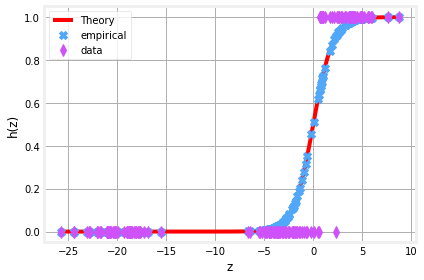

In [14]:
def plot_boundary(Zs, Hs, y):
    data_fit = np.concatenate((Zs, Hs), axis=1)
    data_fit.sort(axis = 0)

    z = np.linspace(Zs.min(), Zs.max(), 100)

    plt.plot(z, logistic(z), 'r-', label='Theory')
    plt.plot(Zs, Hs, 'X', label='empirical', markersize=8)
    plt.plot(Zs, y, 'd', label = 'data', markersize=8)
    plt.xlabel('z')
    plt.ylabel('h(z)')
    #plt.title('Logistic Regression')
    plt.legend()

plot_boundary(Zs, Hs, y)

Utility function to plot labeled points

In [15]:
def plot_points(data, features, weights, label='y'):
    plt.plot(data[features[0]][data[label]==0], 
             data[features[1]][data[label]==0], '*', label='y=0', markersize=8)
    
    plt.plot(data[features[0]][data[label]==1], 
             data[features[1]][data[label]==1], 'd', label='y=1', markersize=8)

    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.legend()

C:\Users\Owner\Anaconda\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


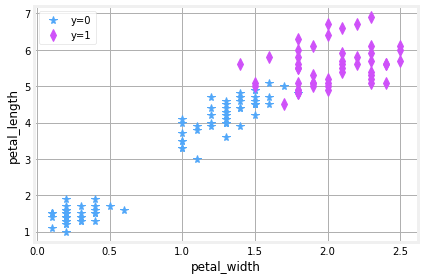

In [16]:
plot_points(data, ['petal_width', 'petal_length'], weights)

The separation bounday is not perfect here either

C:\Users\Owner\Anaconda\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


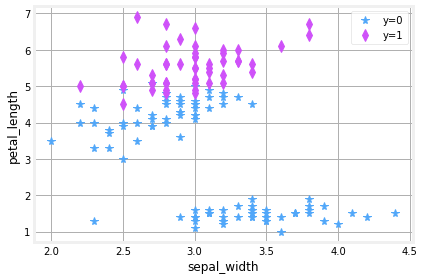

In [17]:
plot_points(data, ['sepal_width', 'petal_length'], weights)

C:\Users\Owner\Anaconda\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


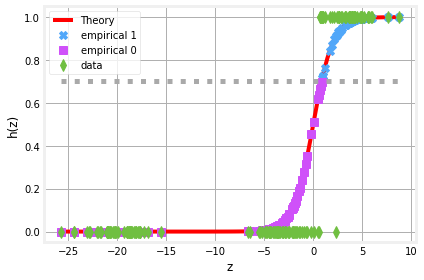

In [18]:
def plot_boundary_threshold(Zs, Hs, y, threshold=0.5):
    data_fit = np.concatenate((Zs, Hs), axis=1)
    data_fit.sort(axis = 0)

    z = np.linspace(Zs.min(), Zs.max(), 100)

    plt.plot(z, logistic(z), 'r-', label='Theory')
    plt.plot(Zs[Hs>threshold], Hs[Hs>threshold], 'X', label='empirical 1', markersize=8)
    plt.plot(Zs[Hs<=threshold], Hs[Hs<=threshold], 's', label='empirical 0', markersize=8)

    plt.plot(Zs, y, 'd', label = 'data', markersize=8)
    plt.xlabel('z')
    plt.ylabel('h(z)')    
    plt.plot([Zs.min(), Zs.max()], [threshold, threshold],  lw=5, linestyle=':', color='darkgray')
    plt.legend()

plot_boundary_threshold(Zs, Hs, y, 0.7)

## No Assignment !!! 

### Do it Yourself !!!
>Use your data to experiment with regression by choosing one of three regression types.  
> It's all up to You!!  


### And Try running the following code and put comments (explanations) on each line of code and write a description of the output

> It's all up to You!!  Not required!!!

### MNIST 

In [19]:
import numpy as np

# softmax 
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)
scores = [1, 7, 2, 1, 1, 1, 1, 3, 1, 1]
print(softmax(scores))

[0.00237792 0.95932017 0.00646385 0.00237792 0.00237792 0.00237792
 0.00237792 0.01757056 0.00237792 0.00237792]


In [20]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  %tensorflow_version 2.x
except Exception:
  pass

In [1]:
import tensorflow as tf
tf.random.set_seed(1)

C:\Users\Owner\miniconda3\envs\jeff_heaton_t81_park\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Owner\miniconda3\envs\jeff_heaton_t81_park\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Owner\miniconda3\envs\jeff_heaton_t81_park\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\U

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

# Get MNIST Data

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [4]:
gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

In [5]:
x_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

# MLP Model for classifiation

In [6]:
model = Sequential([
    Flatten(input_shape=(28, 28)),    # reshape 28 row x 28 column data to Flatten (28*28 rows)
    Dense(256, activation='sigmoid'), # dense layer 1
    Dense(128, activation='sigmoid'), # dense layer 2
    Dense(10, activation='softmax'),  # dense layer 3
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train

In [7]:
model.fit(x_train, y_train, epochs=10, batch_size=2000, validation_split = 0.2)

Epoch 1/10
24/24 [==============================] - 1s 40ms/step - loss: 2.2103 - accuracy: 0.2821 - val_loss: 1.6765 - val_accuracy: 0.6772
Epoch 2/10
24/24 [==============================] - 0s 18ms/step - loss: 1.4961 - accuracy: 0.6937 - val_loss: 0.9877 - val_accuracy: 0.8015
Epoch 3/10
24/24 [==============================] - 0s 18ms/step - loss: 0.9065 - accuracy: 0.8072 - val_loss: 0.6429 - val_accuracy: 0.8677
Epoch 4/10
24/24 [==============================] - 0s 17ms/step - loss: 0.6213 - accuracy: 0.8629 - val_loss: 0.4766 - val_accuracy: 0.8901
Epoch 5/10
24/24 [==============================] - 0s 17ms/step - loss: 0.4816 - accuracy: 0.8846 - val_loss: 0.3923 - val_accuracy: 0.9030
Epoch 6/10
24/24 [==============================] - 0s 17ms/step - loss: 0.4052 - accuracy: 0.8976 - val_loss: 0.3438 - val_accuracy: 0.9107
Epoch 7/10
24/24 [==============================] - 0s 17ms/step - loss: 0.3545 - accuracy: 0.9056 - val_loss: 0.3120 - val_accuracy: 0.9163
Epoch 8/10
24

# Test

In [8]:
results = model.evaluate(x_test,  y_test, verbose = 0)

print('test loss, test acc:', results)

test loss, test acc: [0.26460137963294983, 0.9257000088691711]
